In [21]:
import numpy as np    
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm       

In [22]:
a = 0.26
def u(x,t):  return np.cos(np.pi*x) - np.sin(2*np.pi*t)/2 + 2*np.pi*x - 3.5*t
def fi(x): return np.cos(np.pi*x) + 2*np.pi*x
def g_1(t): return 1 - np.sin(2*np.pi*t)/2 - 3.5*t
def f(x,t): return -np.pi*(np.cos(2*np.pi*t) + a*(np.sin(np.pi*x) - 2)) - 3.5

In [23]:
def mygreed(Nx, Nt, x_0=0, x_N=1, t_0=0, t_N=1):
    return np.linspace(x_0,x_N,Nx), np.linspace(t_0,t_N,Nt)

def plot_3d(xm,tm,um,title = '',x_lable = 'x',y_lable = 't',z_lable = 'Z'):
    ax = axes3d.Axes3D(plt.figure())
    ax.set_xlabel(x_lable)
    ax.set_ylabel(y_lable)
    ax.set_zlabel(z_lable)
    ax.plot_surface(xm, tm , um, rstride=25, cstride=25)
    plt.show()
def plot_3d_color(xm,tm,um,title = '',x_lable = 'x',y_lable = 't',z_lable = 'Z'):
    ax = axes3d.Axes3D(plt.figure())
    ax.set_xlabel(x_lable)
    ax.set_ylabel(y_lable)
    ax.set_zlabel(z_lable)
    ax.plot_surface(xm, tm , um, rstride=5, cstride=5,cmap = cm.jet )
    plt.show()    


In [24]:
def solve(dx, dt, f, fi, g_1, a):
    Nx, Nt = int(1/dx), int(1/dt)
    x, t = mygreed(Nx, Nt) 
    U = np.zeros(shape = (Nt,Nx))
    U[0,:], U[:,0] = fi(x[:]), g_1(t[:])  
    
    q = dx + a*dt
    for j in range(1,Nx):
        g = f(x[j],t[:])
        for n in range(0,Nt-1):
            U[n+1,j] = (dx*U[n,j] + dt*(a*U[n+1,j-1] + dx*g[n+1]))/q 
                        
    return U

In [25]:
dx = 1e-2
dt = 1e-1
Nx, Nt = int(1/dx), int(1/dt)
x,t = mygreed(Nx,Nt)
xm, tm = np.meshgrid(x, t)
U = solve(dx, dt, f, fi, g_1, a)
u_exact = u(xm,tm)

Максимальная погрешность: 0.4831072444108866
Теоретический порядок погрешности O(dx + dt): 0.11


<IPython.core.display.Javascript object>


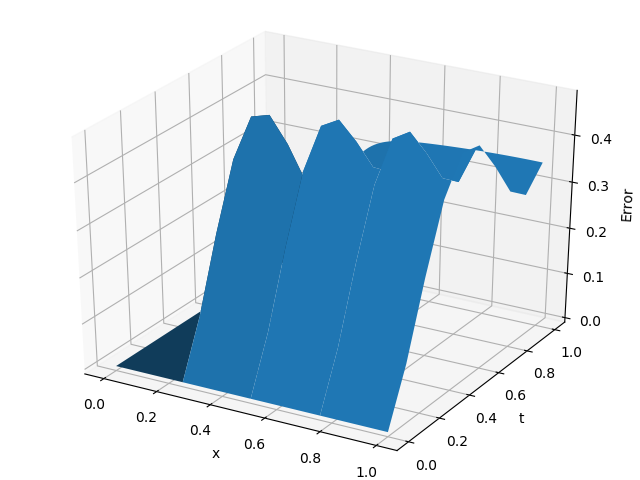

In [26]:
err=abs(U - u_exact)
print("Максимальная погрешность:",err.max())
print("Теоретический порядок погрешности O(dx + dt):", dx + dt)
plot_3d(xm,tm,err,z_lable = 'Error')

<IPython.core.display.Javascript object>


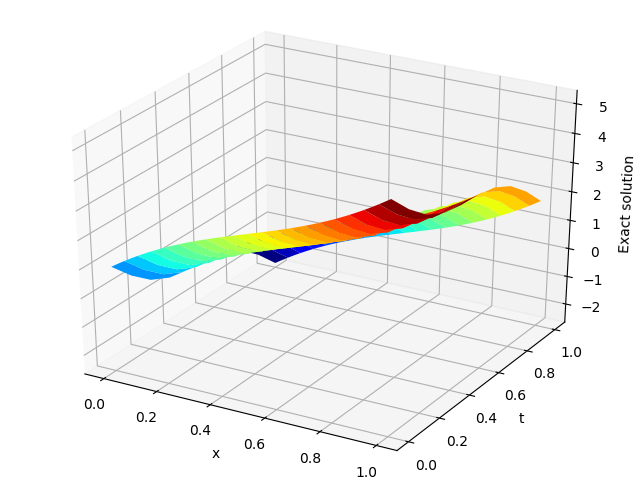

<IPython.core.display.Javascript object>


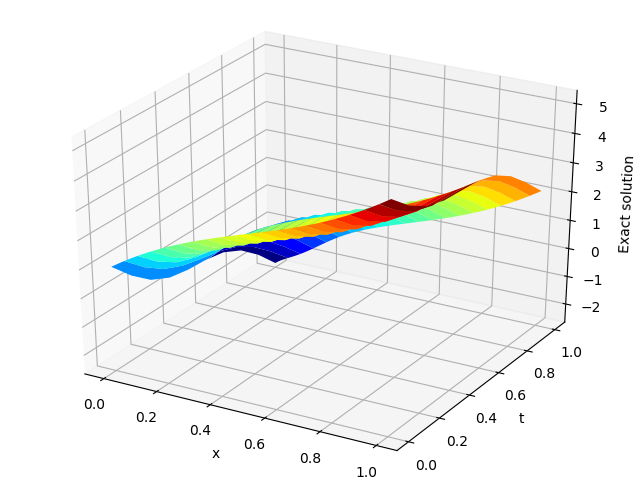

In [27]:
plot_3d_color(xm,tm,u_exact,z_lable = 'Exact solution')
plot_3d_color(xm,tm,U,z_lable = 'Exact solution')